# K_Nearest_Neighbors

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

### Model 1
#### Read CSV

In [2]:
train_m1 = pd.read_csv('../../../../Data_AA2/train_m1.csv', sep = ',')
train_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,-0.756929,-1.925779,0.580938,-0.515445,0.939376,-0.453565,-0.763196,1.192581,0.001762,...,-0.561357,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.259352,0.395979,0
1,0.37521,1.471189,-0.283258,-0.824024,-0.515445,0.939376,-0.453565,1.310279,-0.098471,-0.713715,...,0.148956,0.196894,-0.348973,0.188003,0.837519,1.529013,-0.281151,0.769787,0.843536,0
2,0.37521,0.078615,-0.283258,1.049258,-0.515445,0.939376,-0.453565,-0.763196,-1.389523,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.773829,0.843536,0
3,0.37521,-0.756929,-0.283258,-0.824024,-0.515445,-1.090085,-0.453565,1.310279,1.192581,1.432715,...,-0.206200,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.284758,0.395979,0
4,0.37521,-1.035444,-1.925779,1.049258,1.938451,0.939376,-0.453565,1.310279,0.762230,-0.713715,...,0.859269,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0


In [3]:
test_m1 = pd.read_csv('../../../../Data_AA2/test_m1.csv', sep = ',')
test_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,1.471189,-0.283258,0.580938,-0.515445,0.939376,-0.453565,1.310279,0.762230,0.717238,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0
1,0.37521,0.914159,-1.925779,-0.355703,-0.515445,-1.090085,-0.453565,1.310279,0.762230,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.709736,0.329470,0
2,0.37521,1.471189,-0.283258,0.580938,1.938451,0.939376,-0.453565,1.310279,0.762230,-1.429191,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.711468,0.329470,0
3,0.37521,-0.756929,1.359263,-1.760665,-0.515445,-1.090085,-0.453565,-0.763196,0.762230,1.432715,...,-0.561357,0.196894,1.662067,-2.562036,-1.202130,-1.180338,-1.231682,-1.354522,-0.943918,0
4,0.37521,-1.035444,-0.283258,1.049258,1.938451,0.939376,-0.453565,-0.763196,-1.389523,0.717238,...,0.148956,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.771519,0.843536,0


In [4]:
#get target
train_m1_target = train_m1['y']
train_m1 = train_m1.drop(columns=['y'])

In [5]:
#get target
test_m1_target = test_m1['y']
test_m1 = test_m1.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,200)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_m1,train_m1_target)
    predictions = knn.predict(test_m1)
    error_rate.append(np.mean(predictions != test_m1_target))

100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [25:55<00:00,  7.81s/it]


Text(0, 0.5, 'Error Rate')

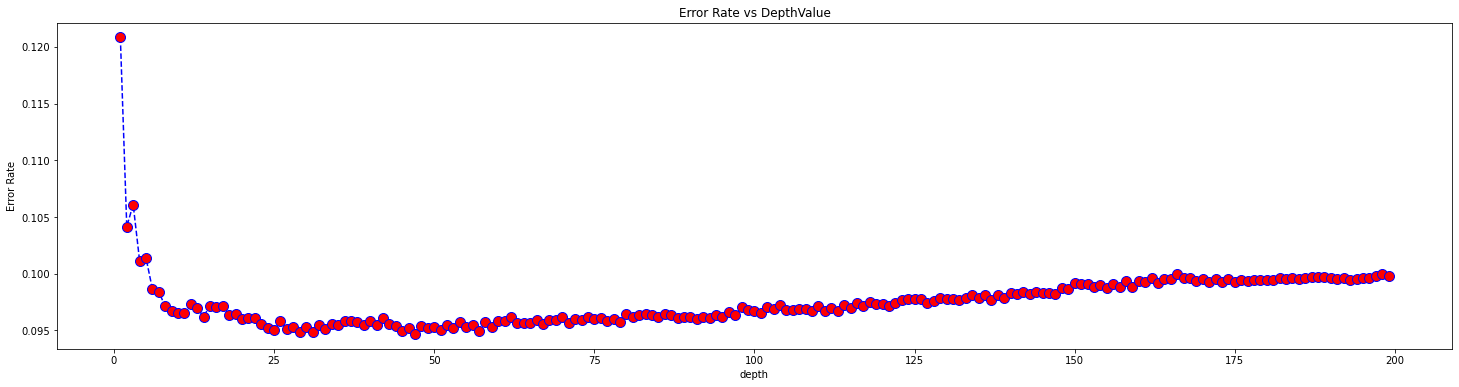

In [7]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [8]:
# Create the parameter grid based on the results of random search 
parameters = {
    'n_neighbors': [29,31,47],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Create the model
knn_model = KNeighborsClassifier()

# Best model
opt_model_knn = GridSearchCV(knn_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_knn.fit(train_m1, train_m1_target)

print (opt_model_knn.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START metric=euclidean, n_neighbors=29, weights=uniform..........
[CV 1/5; 1/12] END metric=euclidean, n_neighbors=29, weights=uniform; total time=   2.5s
[CV 2/5; 1/12] START metric=euclidean, n_neighbors=29, weights=uniform..........
[CV 2/5; 1/12] END metric=euclidean, n_neighbors=29, weights=uniform; total time=   2.4s
[CV 3/5; 1/12] START metric=euclidean, n_neighbors=29, weights=uniform..........
[CV 3/5; 1/12] END metric=euclidean, n_neighbors=29, weights=uniform; total time=   2.6s
[CV 4/5; 1/12] START metric=euclidean, n_neighbors=29, weights=uniform..........
[CV 4/5; 1/12] END metric=euclidean, n_neighbors=29, weights=uniform; total time=   2.8s
[CV 5/5; 1/12] START metric=euclidean, n_neighbors=29, weights=uniform..........
[CV 5/5; 1/12] END metric=euclidean, n_neighbors=29, weights=uniform; total time=   2.7s
[CV 1/5; 2/12] START metric=euclidean, n_neighbors=29, weights=distance.........
[CV 1/5;

[CV 4/5; 10/12] END metric=manhattan, n_neighbors=31, weights=distance; total time=   3.5s
[CV 5/5; 10/12] START metric=manhattan, n_neighbors=31, weights=distance........
[CV 5/5; 10/12] END metric=manhattan, n_neighbors=31, weights=distance; total time=   3.5s
[CV 1/5; 11/12] START metric=manhattan, n_neighbors=47, weights=uniform.........
[CV 1/5; 11/12] END metric=manhattan, n_neighbors=47, weights=uniform; total time=   3.9s
[CV 2/5; 11/12] START metric=manhattan, n_neighbors=47, weights=uniform.........
[CV 2/5; 11/12] END metric=manhattan, n_neighbors=47, weights=uniform; total time=   3.4s
[CV 3/5; 11/12] START metric=manhattan, n_neighbors=47, weights=uniform.........
[CV 3/5; 11/12] END metric=manhattan, n_neighbors=47, weights=uniform; total time=   3.7s
[CV 4/5; 11/12] START metric=manhattan, n_neighbors=47, weights=uniform.........
[CV 4/5; 11/12] END metric=manhattan, n_neighbors=47, weights=uniform; total time=   4.0s
[CV 5/5; 11/12] START metric=manhattan, n_neighbors=4

#### Create and fit the model

In [9]:
# Create model with best parameters
knn_best_model = KNeighborsClassifier(metric='manhattan', n_neighbors=31)

# Fit the best model
knn_best_model.fit(train_m1, train_m1_target)
knn_best_model

KNeighborsClassifier(metric='manhattan', n_neighbors=31)

In [10]:
predictions = knn_best_model.predict(test_m1)

# Confusion matrix
confusion = pd.crosstab(test_m1_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0    1    All
Actual                      
0          10799  169  10968
1           1011  378   1389
All        11810  547  12357


In [11]:
# Accuracy
score = accuracy_score(test_m1_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.904508


In [12]:
# Report
print(classification_report(test_m1_target,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.69      0.27      0.39      1389

    accuracy                           0.90     12357
   macro avg       0.80      0.63      0.67     12357
weighted avg       0.89      0.90      0.89     12357



In [ ]:
# Validate model using best model and cross validation
pecc_knn = cross_val_score(knn_best_model, train_m1, train_m1_target, cv = 5).mean()
pecc_knn

### Model 2
#### Read CSV

In [ ]:
train_m2 = pd.read_csv('../../../../Data_AA2/train_m2.csv', sep = ',')
train_m2.head()

In [ ]:
test_m2 = pd.read_csv('../../../../Data_AA2/test_m2.csv', sep = ',')
test_m2.head()

In [ ]:
#get target
train_m2_target = train_m2['y']
train_m2 = train_m2.drop(columns=['y'])

In [ ]:
#get target
test_m2_target = test_m2['y']
test_m2 = test_m2.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_m2,train_m2_target)
    predictions = knn.predict(test_m2)
    error_rate.append(np.mean(predictions != test_m2_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'n_neighbors': [11,12,13,14],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Create the model
knn_model = KNeighborsClassifier()

# Best model
opt_model_knn = GridSearchCV(knn_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_knn.fit(train_m2, train_m2_target)

print (opt_model_knn.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
knn_best_model = KNeighborsClassifier()

# Fit the best model
knn_best_model.fit(train_m2, train_m2_target)
knn_best_model

In [ ]:
predictions = knn_best_model.predict(test_m2)

# Confusion matrix
confusion = pd.crosstab(test_m2_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m2_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m2_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_knn = cross_val_score(knn_best_model, train_m2, train_m2_target, cv = 5).mean()
pecc_knn

### Model 3
#### Read CSV

In [ ]:
train_m3 = pd.read_csv('../../../../Data_AA2/train_m3.csv', sep = ',')
train_m3.head()

In [ ]:
test_m3 = pd.read_csv('../../../../Data_AA2/test_m3.csv', sep = ',')
test_m3.head()

In [ ]:
#get target
train_m3_target = train_m3['y']
train_m3 = train_m3.drop(columns=['y'])

In [ ]:
#get target
test_m3_target = test_m3['y']
test_m3 = test_m3.drop(columns=['y'])

### Check for lower errors

In [ ]:
eerror_rate = []

for i in tqdm(range(1,200)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_m3,train_m3_target)
    predictions = knn.predict(test_m3)
    error_rate.append(np.mean(predictions != test_m3_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'n_neighbors': [11,12,13,14],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Create the model
knn_model = KNeighborsClassifier()

# Best model
opt_model_knn = GridSearchCV(knn_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_knn.fit(train_m3, train_m3_target)

print (opt_model_knn.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
knn_best_model = KNeighborsClassifier()

# Fit the best model
knn_best_model.fit(train_m3, train_m3_target)
knn_best_model

In [ ]:
predictions = knn_best_model.predict(test_m3)

# Confusion matrix
confusion = pd.crosstab(test_m3_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m3_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m3_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_knn = cross_val_score(knn_best_model, train_m3, train_m3_target, cv = 5).mean()
pecc_knn

### Model 4
#### Read CSV

In [ ]:
train_m4 = pd.read_csv('../../../../Data_AA2/train_m4.csv', sep = ',')
train_m4.head()

In [ ]:
test_m4 = pd.read_csv('../../../../Data_AA2/test_m4.csv', sep = ',')
test_m4.head()

In [ ]:
#get target
train_m4_target = train_m4['y']
train_m4 = train_m4.drop(columns=['y'])

In [ ]:
#get target
test_m4_target = test_m4['y']
test_m4 = test_m4.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_m4,train_m4_target)
    predictions = knn.predict(test_m4)
    error_rate.append(np.mean(predictions != test_m4_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'n_neighbors': [11,12,13,14],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Create the model
knn_model = KNeighborsClassifier()

# Best model
opt_model_knn = GridSearchCV(knn_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_knn.fit(train_m4, train_m4_target)

print (opt_model_knn.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
knn_best_model = KNeighborsClassifier()

# Fit the best model
knn_best_model.fit(train_m4, train_m4_target)
knn_best_model

In [ ]:
predictions = knn_best_model.predict(test_m4)

# Confusion matrix
confusion = pd.crosstab(test_m4_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m4_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m4_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_knn = cross_val_score(knn_best_model, train_m4, train_m4_target, cv = 5).mean()
pecc_knn